In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
sns.set_color_codes()
import pandas as pd
import numpy as np
import os
import xml.etree.cElementTree as ET
from matplotlib.ticker import FuncFormatter

## plot training curves in small grid env

In [3]:
base_dir = '/home/hadoop/Downloads/deeprl_signal_control-master'
plot_dir = base_dir + '/plots'
if not os.path.exists(plot_dir):
    os.mkdir(plot_dir)
color_cycle = sns.color_palette()
COLORS = {'ma2c': color_cycle[0], 'ia2c': color_cycle[1], 'iqll': color_cycle[2], 
          'iqld': color_cycle[3], 'greedy':color_cycle[4], 'mqld': color_cycle[5]}
TRAIN_STEP = 1e6

In [4]:
window = 40
def plot_train_curve_old(scenario='small_grid', date='jun06'):
    cur_dir = base_dir + ('/%s/train_data' % scenario)
    names = ['global', 'local', 'neighbor']
    labels = ['Centralized A2C', 'Independent A2C', 'Multi-agent A2C']
    if scenario == 'large_grid':
        names = names[1:]
        labels = labels[1:]
    dfs = {}
    for file in os.listdir(cur_dir):
        name = file.split('_')[0]
        print(file + ', ' + name)
        if name in names:
            df = pd.read_csv(cur_dir + '/' + file)
            dfs[name] = df

    plt.figure(figsize=(8,6))
#     ymin = min([df.value.min() for df in dfs.values()])
#     ymax = max([df.value.max() for df in dfs.values()])
    ymin = []
    ymax = []
    xmin = min([df.step.min() for df in dfs.values()])
    for i, name in enumerate(names):
        df = dfs[name]
#         plt.plot(df.Step.values, df.Value.values, color=COLORS[i], linewidth=3, label=labels[i])
        x_mean = df.value.rolling(window).mean().values
        x_std = df.value.rolling(window).std().values
#         x_hi = df.value.rolling(window).max().values
        plt.plot(df.step.values, x_mean, color=COLORS[name], linewidth=3, label=labels[i])
        ymin.append(np.nanmin(x_mean - x_std))
        ymax.append(np.nanmax(x_mean + x_std))
        plt.fill_between(df.step.values, x_mean - x_std, x_mean + x_std, facecolor=COLORS[name], edgecolor='none', alpha=0.3)
    ymin = min(ymin)
    ymax = max(ymax)
    plt.xlim([xmin,TRAIN_STEP])
    plt.ylim([ymin * 1.05, ymax * 0.95])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    # plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
    plt.xlabel('Training step', fontsize=20)
    plt.ylabel('Averaged episode reward', fontsize=20)
    plt.legend(loc='lower right', fontsize=20)
    plt.tight_layout()
    # plt.savefig(plot_dir + '/small_grid_train.png')
    plt.savefig(plot_dir + ('/%s_train.pdf' % scenario))
    plt.close()

    # calculate performance gains
    print('final performance wrt centralized agent:')
    ys = {}
    for name in names:
        y = dfs[name].value.values
        final = np.mean(y[-window:])
        init = np.mean(y[:window])
        gain = final - init
        print('%s: final: %.2f' % (name, final))
plot_train_curve()

NameError: name 'plot_train_curve' is not defined

In [8]:
window = 100
def plot_train_curve(scenario='large_grid', date='oct07'):
    cur_dir = base_dir + ('/%s/train_data' % scenario)
#    names = ['ma2c', 'ia2c', 'iqll']
#    labels = ['MA2C', 'IA2C', 'IQL-LR']
    names = ['ma2c', 'ia2c', 'iqll', 'iqld', 'mqld']
    labels = ['MA2C', 'IA2C', 'IQL-LR', 'IQL-DNN', 'MQL']
#     names = ['ma2c', 'ia2c', 'iqld', 'iqll']
#     labels = ['MA2C', 'IA2C', 'IQL-DNN', 'IQL-LR']
    dfs = {}
    for file in os.listdir(cur_dir):
        name = file.split('_')[0]
        print(file + ', ' + name)
        if (name in names) and (name != 'greedy'):
            df = pd.read_csv(cur_dir + '/' + file)
            dfs[name] = df[df.test_id == -1]

    plt.figure(figsize=(9,6))
    
#     ax = fig.add_subplot(111)
#     ax.patch.set_facecolor('white')
#     ax.patch.set_alpha(0.5)
    
    
    
    ymin = []
    ymax = []
    
    for i, name in enumerate(names):
        if name == 'greedy':
            plt.axhline(y=-972.28, color=COLORS[name], linewidth=3, label=labels[i])
        else:
            df = dfs[name]
            x_mean = df.avg_reward.rolling(window).mean().values
            x_std = df.avg_reward.rolling(window).std().values
            plt.plot(df.step.values, x_mean, color=COLORS[name], linewidth=3, label=labels[i])
            ymin.append(np.nanmin(x_mean - 0.5 * x_std))
            ymax.append(np.nanmax(x_mean + 0.5 * x_std))
            plt.fill_between(df.step.values, x_mean - x_std, x_mean + x_std, facecolor=COLORS[name], edgecolor='none', alpha=0.1)
            
            
            
            
    ymin = min(ymin)
    ymax = max(ymax)
    plt.xlim([0, TRAIN_STEP])
    if scenario == 'large_grid':
        plt.ylim([-2500, 0])
    else:
        plt.ylim([-225, -100])
    
    def millions(x, pos):
        return '%1.1fM' % (x*1e-6)

    formatter = FuncFormatter(millions)
    plt.gca().xaxis.set_major_formatter(formatter)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Training step', fontsize=18)
    plt.ylabel('Average episode reward', fontsize=18)
    plt.legend(loc='lower left', fontsize=12)
    plt.tight_layout()
    plt.savefig(plot_dir + ('/%s_train.pdf' % scenario))
    plt.close()

plot_train_curve(date='sep2019')

mqld_train_reward.csv, mqld
iqld_train_reward.csv, iqld
ma2c_train_reward.csv, ma2c
ia2c_train_reward.csv, ia2c
iqll_train_reward.csv, iqll


## plot training curves in large grid env

In [5]:
plot_train_curve(scenario='real_net')

NameError: name 'plot_train_curve' is not defined

## plot evaluation curves in small grid env

In [6]:
episode_sec = 3600
def fixed_agg(xs, window, agg):
    xs = np.reshape(xs, (-1, window))
    if agg == 'sum':
        return np.sum(xs, axis=1)
    elif agg == 'mean':
        return np.mean(xs, axis=1)
    elif agg == 'median':
        return np.median(xs, axis=1)

def varied_agg(xs, ts, window, agg):
    t_bin = window
    x_bins = []
    cur_x = []
    xs = list(xs) + [0]
    ts = list(ts) + [episode_sec + 1]
    i = 0
    while i < len(xs):
        x = xs[i]
        t = ts[i]
        if t <= t_bin:
            cur_x.append(x)
            i += 1
        else:
            if not len(cur_x):
                x_bins.append(0)
            else:
                if agg == 'sum':
                    x_stat = np.sum(np.array(cur_x))
                elif agg == 'mean':
                    x_stat = np.mean(np.array(cur_x))
                elif agg == 'median':
                    x_stat = np.median(np.array(cur_x))
                x_bins.append(x_stat)
            t_bin += window
            cur_x = []
    return np.array(x_bins)
    
def plot_series(df, name, tab, label, color, window=None, agg='sum', reward=False):
    episodes = list(df.episode.unique())
    num_episode = len(episodes)
    num_time = episode_sec
    print(label, name)
    # always use avg over episodes
    if tab != 'trip':
        res = df.loc[df.episode == episodes[0], name].values
        for episode in episodes[1:]:
            res += df.loc[df.episode == episode, name].values
        res = res / num_episode
        print('mean: %.2f' % np.mean(res))
        print('std: %.2f' % np.std(res))
        print('min: %.2f' % np.min(res))
        print('max: %.2f' % np.max(res))
    else:
        res = []
        for episode in episodes:
            res += list(df.loc[df.episode == episode, name].values)
        
        print('mean: %d' % np.mean(res))
        print('max: %d' % np.max(res))
        
    if reward:
        num_time = 720
    if window and (agg != 'mv'):
        num_time = num_time // window
    x = np.zeros((num_episode, num_time))
    for i, episode in enumerate(episodes):
        t_col = 'arrival_sec' if  tab == 'trip' else 'time_sec' 
        cur_df = df[df.episode == episode].sort_values(t_col)
        if window and (agg == 'mv'):
            cur_x = cur_df[name].rolling(window, min_periods=1).mean().values
        else:
            cur_x = cur_df[name].values    
        if window and (agg != 'mv'):
            if tab == 'trip':
                cur_x = varied_agg(cur_x, df[df.episode == episode].arrival_sec.values, window, agg)
            else:    
                cur_x = fixed_agg(cur_x, window, agg)
#         print(cur_x.shape)
        x[i] = cur_x
    if num_episode > 1:
        x_mean = np.mean(x, axis=0)
        x_std = np.std(x, axis=0)
    else:
        x_mean = x[0]
        x_std = np.zeros(num_time)
    if (not window) or (agg == 'mv'):
        t = np.arange(1, episode_sec + 1)
        if reward:
            t = np.arange(5, episode_sec + 1, 5)
    else:
        t = np.arange(window, episode_sec + 1, window)
#     if reward:
#         print('%s: %.2f' % (label, np.mean(x_mean)))


    # important sentence
    
    plt.plot(t, x_mean, color=color, linewidth=3, label=label)
    
    
    ###
    # plt.fill_between(t, x_mean - x_std, x_mean + x_std, facecolor=color, edgecolor='none', alpha=0.1)
    # plt.fill_between(t, x_mean - x_std, x_mean + x_std, facecolor=color, edgecolor='none', alpha=0.1)

    if num_episode > 1:
        x_lo = x_mean - x_std
        if not reward:
            x_lo = np.maximum(x_lo, 0)
        x_hi = x_mean + x_std
        plt.fill_between(t, x_lo, x_hi, facecolor=color, edgecolor='none', alpha=0.1)
        return np.nanmin(x_mean - 0.5 * x_std), np.nanmax(x_mean + 0.5 * x_std)
    else:
        # plt.fill_between(t, x_mean - x_std, x_mean + x_std, facecolor=color, edgecolor='none', alpha=0.1)
        return np.nanmin(x_mean), np.nanmax(x_mean)
    
def plot_combined_series(dfs, agent_names, col_name, tab_name, agent_labels, y_label, fig_name,
                         window=None, agg='sum', reward=False):
    plt.figure(figsize=(9,6))
    ymin = np.inf
    ymax = -np.inf
    for i, aname in enumerate(agent_names):
        df = dfs[aname][tab_name]
        y0, y1 = plot_series(df, col_name, tab_name, agent_labels[i], COLORS[aname], window=window, agg=agg,
                             reward=reward)
        ymin = min(ymin, y0)
        ymax = max(ymax, y1)
    
    plt.xlim([0, episode_sec])
    if (col_name == 'average_speed') and ('global' in agent_names):
        plt.ylim([0, 6])
    elif (col_name == 'wait_sec') and ('global' not in agent_names):
        plt.ylim([0, 3500])
    else:
        plt.ylim([ymin, ymax])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Simulation time (sec)', fontsize=18)
    plt.ylabel(y_label, fontsize=18)
    plt.legend(loc='upper left', fontsize=18)
    plt.tight_layout()
    plt.savefig(plot_dir + ('/%s.pdf' % fig_name))
    plt.close()
    
def sum_reward(x):
    x = [float(i) for i in x.split(',')]
    return np.sum(x)

def plot_eval_curve(scenario='large_grid', date='dec16'):
    cur_dir = base_dir + ('/%s/eva_data' % scenario)
    names = ['ma2c', 'ia2c', 'iqll', 'iqld', 'mqld', 'greedy']
    labels = ['MA2C', 'IA2C', 'IQL-LR', 'IQL-DNN', 'MQL', 'Greedy']
#    names = ['ma2c', 'ia2c', 'iqll', 'greedy']
#    labels = ['MA2C', 'IA2C', 'IQL-LR', 'Greedy']
#     names = ['iqld', 'greedy']
#     labels = ['IQL-DNN','Greedy']
#    names = ['ia2c', 'greedy']
#    labels = ['IA2C', 'Greedy']
    dfs = {}
    for file in os.listdir(cur_dir):
        if not file.endswith('.csv'):
            continue
        if not file.startswith(scenario):
            continue
        name = file.split('_')[2]
        measure = file.split('_')[3].split('.')[0]
        if name in names:
            df = pd.read_csv(cur_dir + '/' + file)
#             if measure == 'traffic':
#                 df['ratio_stopped_car'] = df.number_stopped_car / df.number_total_car * 100
#             if measure == 'control':
#                 df['global_reward'] = df.reward.apply(sum_reward)
            if name not in dfs:
                dfs[name] = {}
            dfs[name][measure] = df
    
    # plot avg queue
    plot_combined_series(dfs, names, 'avg_queue', 'traffic', labels,
                         'Average queue length (veh)', scenario + '_queue', window=60, agg='mv')
    # plot avg speed
    plot_combined_series(dfs, names, 'avg_speed_mps', 'traffic', labels,
                         'Average car speed (m/s)', scenario + '_speed', window=60, agg='mv')
    # plot avg waiting time
    plot_combined_series(dfs, names, 'avg_wait_sec', 'traffic', labels,
                         'Average intersection delay (s/veh)', scenario + '_wait', window=60, agg='mv')
    # plot trip completion
    plot_combined_series(dfs, names, 'number_arrived_car', 'traffic', labels,
                         'Trip completion rate (veh/5min)', scenario + '_tripcomp', window=300, agg='sum')
    # plot trip time
#     plot_combined_series(dfs, names, 'duration_sec', 'trip', labels,
#                          'Avg trip time (sec)', scenario + '_triptime', window=60, agg='mean')
#     plot trip waiting time
    plot_combined_series(dfs, names, 'wait_sec', 'trip', labels,
                         'Avg trip delay (s)', scenario + '_tripwait', window=60, agg='mean')
    plot_combined_series(dfs, names, 'reward', 'control', labels,
                         'Step reward', scenario + '_reward', reward=True, window=6, agg='mv')
plot_eval_curve()

MA2C avg_queue
mean: 1.87
std: 1.04
min: 0.00
max: 4.17
IA2C avg_queue
mean: 3.47
std: 2.08
min: 0.00
max: 6.20
IQL-LR avg_queue
mean: 4.04
std: 2.90
min: 0.00
max: 8.23
IQL-DNN avg_queue
mean: 4.12
std: 2.74
min: 0.00
max: 7.88
MQL avg_queue
mean: 1.02
std: 0.37
min: 0.00
max: 1.93
Greedy avg_queue
mean: 2.02
std: 1.28
min: 0.00
max: 3.64
MA2C avg_speed_mps
mean: 2.56
std: 1.20
min: 0.00
max: 13.30
IA2C avg_speed_mps
mean: 1.73
std: 1.56
min: 0.00
max: 11.82
IQL-LR avg_speed_mps
mean: 2.62
std: 3.05
min: 0.00
max: 13.77
IQL-DNN avg_speed_mps
mean: 1.87
std: 1.98
min: 0.00
max: 9.77
MQL avg_speed_mps
mean: 2.94
std: 0.71
min: 0.00
max: 8.24
Greedy avg_speed_mps
mean: 3.52
std: 2.97
min: 0.00
max: 13.30
MA2C avg_wait_sec
mean: 14.14
std: 9.38
min: 0.00
max: 48.20
IA2C avg_wait_sec
mean: 55.71
std: 46.13
min: 0.00
max: 169.83
IQL-LR avg_wait_sec
mean: 79.46
std: 94.74
min: 0.00
max: 329.13
IQL-DNN avg_wait_sec
mean: 136.84
std: 107.45
min: 0.00
max: 331.44
MQL avg_wait_sec
mean: 13.54
st

# plot evaluation curves in large grid env

MA2C avg_queue
mean: 0.29
std: 0.22
min: 0.00
max: 0.75
IA2C avg_queue
mean: 0.52
std: 0.38
min: 0.00
max: 1.16
IQL-LR avg_queue
mean: 1.19
std: 0.83
min: 0.00
max: 2.21
IQL-DNN avg_queue
mean: 1.57
std: 0.97
min: 0.00
max: 2.69


KeyError: 'mqld'

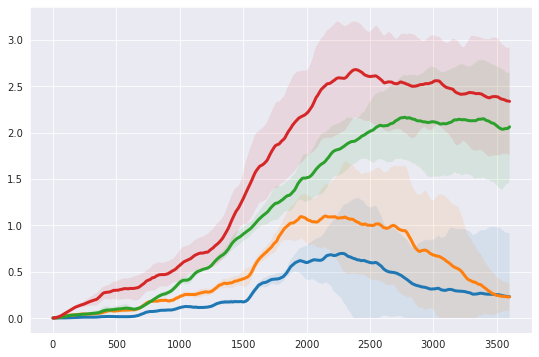

In [7]:
plot_eval_curve(scenario='real_net')

In [ ]:
peak_flow1 = 1100
peak_flow2 = 925
colors = 'brgm'
ratios1 = np.array([0.4, 0.7, 0.9, 1.0, 0.75, 0.5, 0.25]) # start from 0
ratios2 = np.array([0.3, 0.8, 0.9, 1.0, 0.8, 0.6, 0.2])   # start from 15min
flows1 = peak_flow1 * 0.6 * ratios1
flows2 = peak_flow1 * ratios1
flows3 = peak_flow2 * 0.6 * ratios2
flows4 = peak_flow2 * ratios2
flows = [list(flows1) + [0] * 6, list(flows2) + [0] * 6, 
         [0] * 3 + list(flows3) + [0] * 3, [0] * 3 + list(flows4) + [0] * 3]
t = np.arange(0, 3601, 300)
t1 = t[:8]
t2 = t[3:12]
ts = [t1, t1, t2, t2]

plt.figure(figsize=(9,6))
labels = ['f1', 'F1', 'f2', 'F2']
for i in range(4):
    if i % 2 == 0:
        plt.step(t, flows[i], where='post', color=colors[i], linestyle=':', linewidth=3, label=labels[i])
    else:
        plt.step(t, flows[i], where='post', color=colors[i], linewidth=6, label=labels[i], alpha=0.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Simulation time (sec)', fontsize=18)
plt.ylabel('Flow rate (veh/hr)', fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.xlim([0, 3600])
plt.tight_layout()
plt.savefig(plot_dir + ('/large_grid_flow.pdf'))
plt.close()

In [2]:
x = [406.26, 364.03, 358.48, 348.21, 334.44]
y = [299.84, 314.63, 316.57, 317.97, 319.84]
# x = [112.92, 124.89, 131.78, 139.17, 147.11, 150.48, 155.51]
# y = [358.56, 371.53, 379.00, 384.55, 386.97, 385.87, 384.24]
def get_len(x, y):
    l = 0
    for i in range(len(x) - 1):
        l += np.sqrt((x[i+1] - x[i]) ** 2 + (y[i+1] - y[i]) ** 2)
    print(l)
get_len(x, y)

74.88569578307643


In [3]:
def get_mfd_points(df, dt_sec=300):
    outputs = []
    accs = []
    ts = np.arange(0, 3601, dt_sec)
    for episode in df.episode.unique():
        cur_df = df[df.episode == episode]
        for i in range(len(ts) - 1):
            cur_df1 = cur_df[(cur_df.time_sec >= ts[i]) & (cur_df.time_sec < ts[i+1])]
            outputs.append(np.sum(cur_df1.number_arrived_car.values) * 60 / dt_sec)
            accs.append(np.mean(cur_df1.number_total_car.values))
    return np.array(outputs), np.array(accs)
    
def plot_mfd_curve(scenario='real_net', date='oct07'):
    cur_dir = base_dir + ('/%s/eva_data' % scenario)
    names = ['ma2c', 'ia2c', 'greedy']
    labels = ['MA2C', 'IA2C', 'Greedy']
    dfs = {}
    for file in os.listdir(cur_dir):
        if not file.endswith('traffic.csv'):
            continue
        if not file.startswith(scenario):
            continue
        name = file.split('_')[2]
        if name not in names:
            continue
        df = pd.read_csv(cur_dir + '/' + file)
        outputs, accs = get_mfd_points(df)
        dfs[name] = (accs, outputs)
    
    plt.figure(figsize=(9,6))
    styles = 'o^s'
    for i, name in enumerate(names):
        plt.scatter(dfs[name][0], dfs[name][1], s=80, marker=styles[i], c=COLORS[name], edgecolors='none', label=labels[i], alpha=0.75)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Accumulation (veh)', fontsize=18)
    plt.ylabel('Output flow (veh/min)', fontsize=18)
    plt.legend(loc='upper right', fontsize=18)
    plt.tight_layout()
    plt.savefig(plot_dir + ('/real_net_mfd.pdf'))
    plt.close()
plot_mfd_curve()     

NameError: name 'base_dir' is not defined

In [ ]:
df = pd.read_csv(base_dir + '/real_net_experimental_data/eva_data/real_net_ma2c_control.csv')

In [ ]:
df.groupby('episode').reward.agg('mean')